In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['text.usetex'] = True


plt.rcParams['figure.figsize'] = [8,6]

Plotting the potential for different values of $\gamma/N$. For potential is given by
$$-E_J\cos(\phi-\varphi_e)+\frac{1}{2}\frac{\gamma}{N}E_J\phi^2$$

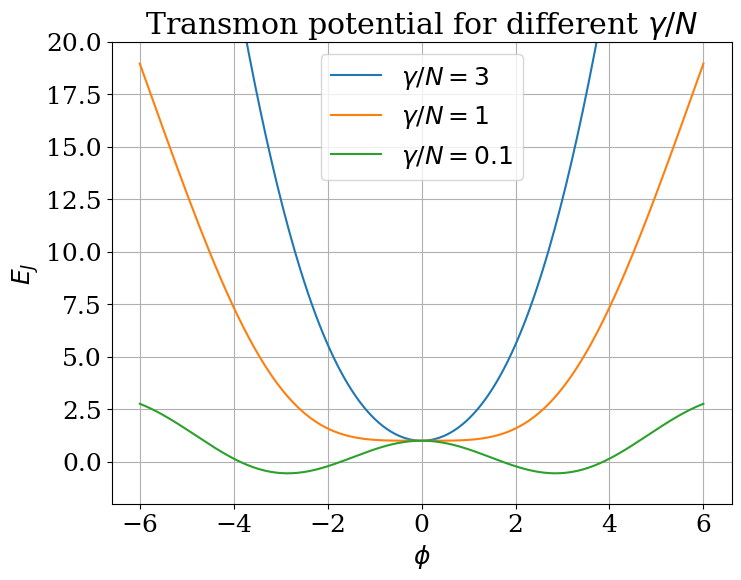

In [2]:
def pot(phi, gammaN):
    return -np.cos(phi+np.pi) + gammaN*phi**2 /2

x = np.linspace(-6, 6, 300)

plt.plot(x, pot(x, 3), label=r"$\gamma/N=3$")
plt.plot(x, pot(x, 1), label=r"$\gamma/N=1$")
plt.plot(x, pot(x, 0.1), label=r"$\gamma/N=0.1$")

plt.ylim(-2, 20)

plt.xlabel(r"$\phi$")
plt.ylabel(r"$E_J$")
plt.title(r"Transmon potential for different $\gamma/N$")

plt.legend()


Plot the potential in $\varphi$ and $\theta$ for small EL for zero and half flux bias.

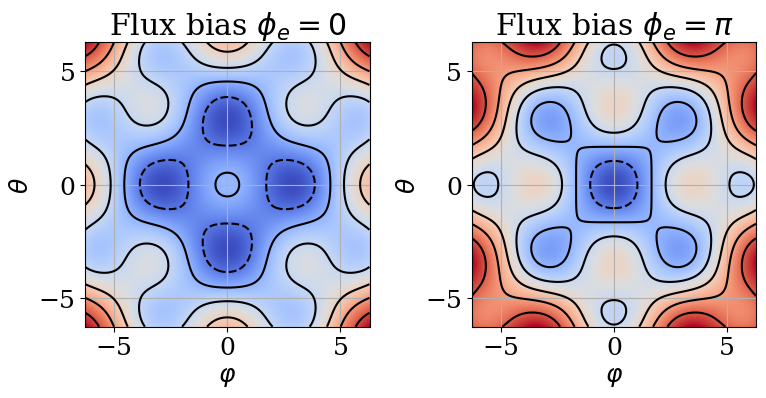

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.linspace(-2*np.pi, 2*np.pi, 200)

def pot(phi, theta, phi_e, E_C = 10, E_L = 1):
    return E_L*phi**2/2 + E_L*theta**2/2 + E_C*np.cos(phi+phi_e)*np.cos(theta)

X, Y = np.meshgrid(x, y)

potentialphi0 = pot(X, Y, phi_e=0)
potentialphipi = pot(X, Y, phi_e=np.pi)


fig, (ax1, ax2) = plt.subplots(1, 2)

contourOffset = (np.amax(potentialphi0)-np.amin(potentialphi0))/10

ax1.imshow(potentialphi0, extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi], cmap="coolwarm")
ax1.contour(X, Y, potentialphi0, np.linspace(np.amin(potentialphi0)+contourOffset, np.amax(potentialphi0)-contourOffset, 6), colors="black")
ax1.set(xlabel = "$\\varphi$", ylabel = "$\\theta$", title = "Flux bias $\phi_e=0$")


ax2.imshow(potentialphipi, extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi], cmap="coolwarm")
ax2.contour(X, Y, potentialphipi, np.linspace(np.amin(potentialphipi)+contourOffset, np.amax(potentialphipi)-contourOffset, 6), colors="black")
ax2.set(xlabel = "$\\varphi$", ylabel = "$\\theta$", title = "Flux bias $\phi_e=\pi$")

fig.tight_layout()

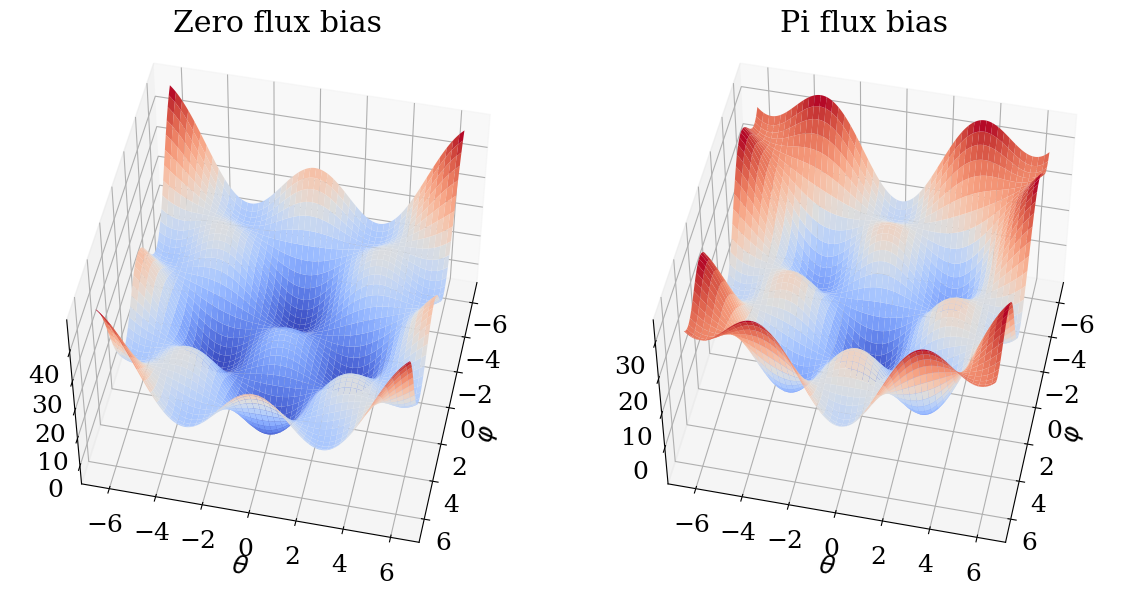

In [4]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
surface0 = ax1.plot_surface(X, Y, potentialphi0, cmap="coolwarm")
ax1.view_init(50, 12)
ax1.set(xlabel="$\\varphi$", ylabel="$\\theta$", title="Zero flux bias")

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
surfacePi= ax2.plot_surface(X, Y, potentialphipi, cmap="coolwarm")
ax2.view_init(50, 12)
ax2.set(xlabel="$\\varphi$", ylabel="$\\theta$", title="Pi flux bias")
fig.tight_layout()